<a href="https://colab.research.google.com/github/JasonJeng/Lab5-Analyzing-flights/blob/main/IDCE30274_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IDCE30274 Lab5**

**Zexing Zheng**

**05/13/2021**

**Python version 3**

This lab conducts studies and practies on a python library csv. Students use real-life data from openflight website to create distance-frequency histogram. Students should first learn how to call rows with wanted information in the csv file by creating loops. Then students create dictionaries to hold latitude and longitude information of each airport and based on these information to calculate distances of each flight. Finally, student use another library to plot the output in histogram.

In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving Camp_stats.csv to Camp_stats.csv


In [ ]:
import csv
f=open("Camp_stats.csv")
for row in csv.reader(f):
    print(row)

['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


# **Challenge 1**

In [16]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports (1).dat


In [40]:
import csv
f = open("airports.dat")
name = input() #create an input variable so this code can better interact with users
for row in csv.reader(f): 
  if row[3] == name.title(): # if the fourth column (country) has the same input value...
      print(row[1]) # print airport names

china
Beijing Capital International Airport
Dongshan Airport
Tianjin Binhai International Airport
Taiyuan Wusu Airport
Guangzhou Baiyun International Airport
Changsha Huanghua International Airport
Guilin Liangjiang International Airport
Nanning Wuxu Airport
Shenzhen Bao'an International Airport
Zhengzhou Xinzheng International Airport
Wuhan Tianhe International Airport
Lanzhou Zhongchuan Airport
Xi'an Xianyang International Airport
Xishuangbanna Gasa Airport
Kunming Changshui International Airport
Xiamen Gaoqi International Airport
Nanchang Changbei International Airport
Fuzhou Changle International Airport
Hangzhou Xiaoshan International Airport
Ningbo Lishe International Airport
Nanjing Lukou Airport
Hefei Luogang International Airport
Liuting Airport
Shanghai Hongqiao International Airport
Yantai Laishan Airport
Chongqing Jiangbei International Airport
Longdongbao Airport
Chengdu Shuangliu International Airport
Xichang Qingshan Airport
Kashgar Airport
Hotan Airport
Ürümqi Diwopu In

# **Challenge 2 - Reading the airport database**

Write code to read through “airports.dat” and create a dictionary mapping from an airport ID key (use the numeric ID in the first field) to the geographic coordinates. You may want to create two dictionaries, one holding latitudes and one holding longitudes.

In [ ]:
lat = {} # create dictionaries for both latitudes and longitudes
lon = {}
import csv
f = open("airports.dat")
for row in csv.reader(f): # create a loop to include all rows in the file
  lat[row[0]] = row[6] # use the airport ID key to combine with the latitudes/longitudes
  lon[row[0]] = row[7]
print(lat)
print(lon)

# **Challenge 3 - Route distances**

Calculating geographic distances is a bit tricky because the earth is a sphere (actually, it's an oblate spheroid). The distance we measure is the “great circle distance”. We’re not going to implement our own great circle distance function in Python here, instead you can download a Python file with a geo_distance() function (use the file geo_distance.py in this repo!). 

In [ ]:
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving routes.dat to routes (1).dat


In [ ]:
route_dis = []

import csv
r = open("routes.dat")
for row in csv.reader(r): 
  # create a loop to include all rows in the file
  if (row[3] in lat) and (row[5] in lat): # if both airports can be found in the dictionary....
    lat1 = float(lat[row[3]]) # extract lat and lon from the dictionaries
    lat2 = float(lat[row[5]])
    lon1= float(lon[row[3]])
    lon2 = float(lon[row[5]])
    result = float(distance(lat1,lon1,lat2,lon2)) # calculate the result by using the function above
    route_dis.append(result) # store the result (float)
print(route_dis)
len(route_dis)

In [22]:
sum = 0 # test to see if the previous code successfully remove the noise
r = open("routes.dat")
for row in csv.reader(r): 
  sum += 1
sum # total row counts in routes.dat

67663

# **Challenge 4 - Histogram**

In [23]:
 #import needed library 
import matplotlib.pyplot as plt

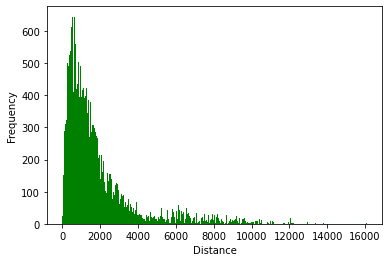

In [36]:

plt.hist(route_dis, bins = 1000, color = 'g') #plot the list in green with 1000 bins
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()
